# Practice: First, Hydro-dynamical PDE models

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

As modelers of stellar atmospheres, we are primarily interested in solving the equations of mass, momentum, and energy balance, along with the equations governing the evolution of the magnetic field, the transport equations for the radiation field, heat flux equations, etc. For this project, we will start with the hydrodynamic equations in 1 dimension as follows: 

$$ \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \bf u) = 0 $$

$$ \frac{\partial \rho {\bf u}}{\partial t} + \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = - \nabla (P_g)$$

$$ \frac{\partial e}{\partial t } = -\nabla\cdot e {\bf u} -P_g \nabla \cdot {\bf u}$$

where $\rho$, $\bf u$, $P_g$, and $e$ are the density, velocity vector, gas pressure, and internal energy. $\cdot$ and $\otimes$ are the dyadic and tensorial product, respectively. One extra equation needs to connect the pressure with the energy. For this you can use $P_g  = (\gamma-1)e/\rho$ where $\gamma=5/3$. Note that, in 1 dimension the operation  $\nabla \cdot (\rho {\bf u} \otimes {\bf u})$ becomes as follows: 

$$ \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = \frac{\partial (\rho u^2)}{\partial x} $$

<span style="color:#78AE7E">

## Questions:

- Should we only work with actual Bifrost, and don't use e.g. the nm_lib anymore...? ?? 
  - workplace, input files, etc. 
- Semya: Can she add thermal conduction if she uses Bifrost? 
- Aline: Same here, can I use only Bifrost to extend to 3 dimensions?


.IDL and .snap- files = setup files. 

-> Brio-Wu test 


-> play with nu and eta
-> first 3 are 


1. run default
2. turn off nu_r and nu_ee and see if it runs nice 

in make_snaps-py file add data[....., 5] 6 and 7 for magnetic field. 



TIMESTEPS: 
Cdt param : = cfl cut in nm_lib 

<span>

## 1- Build or select your code 

In this exercise, you can select one of the following options: 

1. Build your hydro-dynamical (HD) numerical code applying the tools/functions learned during the 6th different assessment. Solve the above set of equations in one dimension. 

    __A plus__ implement the [Bifrost 6th order spatial derivative, 5th order spatial interpolation](https://github.com/AST-Course/AST5110/wiki/Discretization) with the hyper-diffusion scheme (see [wiki](https://github.com/AST-Course/AST5110/wiki/Hyper-diffusive)). Note that Bifrost is using a [staggered mesh](https://github.com/AST-Course/AST5110/wiki/Staggered-mesh) where the density, pressure, energy, and temperature are cell-centered, and velocity and momentum are at the edges (in 1 dimension). 

    __A plus__ implement the [Flux limiter method](https://github.com/AST-Course/AST5110/wiki/Flux-limiter-method).

    __A plus__ implement the [Rieman Solver method](https://github.com/AST-Course/AST5110/wiki/Rieman-Solver-method).

    What would you choose for the CFL condition? 

2. Use the Bifrost, Ebysus, or other numerical codes you are interested in learning. 

    Note that I can help only with the numerical codes that I'm familiar with, but you should still select the ones you are interested in as long as you have access to them. 

    Johannes: Since you do this excersize with an existing code. You will need to investigate, spatial derivative order and temporal orders. Fully test with Riemann solvers. As well as investigate the k-diagrams for a test that has initial random perturbations in density/velocity. 

<span style="color:#78AE7E">

I will use the Bifrost code with the Dispatch framework. 

GitHub: https://github.com/ITA-Solar/Dispatch-Bifrost
 

</span>

## 2- Test the code

Set your code to run a 1D problem using the following initial conditions. The fluid is initially at rest on either side of a density and pressure jump. To the left, respectively right side of the interface, we have: 

$\rho_L = 0.125$

$\rho_R = 1.0$

$Pg_L = 0.125/\gamma$

$Pg_R = 1.0/\gamma$

The ratio of specific heats is chosen to be $\gamma = 5/3$ on both sides of the interface. The units are normalized, with the density and pressure in units of the density and pressure on the left-hand side of the jump and the velocity in units of the sound speed. The length unit is the size of the domain and the time in units of the time required to cross the domain at the speed of sound.

What boundary conditions would you choose?
What do you see? 

This is known as the Sod-shock tube test [Sod et al. 1978](https://ui.adsabs.harvard.edu/abs/1978JCoPh..27....1S/abstract), a standard test in computational HD codes. It consists of a one-dimensional flow discontinuity problem that provides a good test of a compressible code’s ability to capture shocks and contact discontinuities within a few grid zones and produce the correct density profile in a rarefaction or expansion wave. The test can also be used to check if the code can satisfy the Rankine-Hugoniot shock jump conditions since this test has an analytical solution. If you have access, you can also look at _Computational Gasdynamics book from Culbert B. Laney_ Section 5. However, many other books will describe this problem in detail. 
 
Compare the simulation with the analytical solution. This could be used for a sanity test after new additions to the code. 

__Suggestion__ This test might be too complex to debug the code. However, as a starting debugging test, you can consider an advection test (constant initial velocity) of a gaussian density perturbation in pressure balance. 

 Johannes: In addition, add and 1D MHD Roe tests. 

Note that by using the equation of state, $e = P_g/(\gamma - 1)\rho$, it is possible to compute the intial energy. 

<span style="color:#78AE7E">

The Dispatch framework already contains a text-file with data points for the analytical solution of the Sod-shock tube test. I will add the plot here. 

The initial conditions I used are not as described above, but instead they are given as: 

| Left |  | Right |  |
| --- | --- | --- | --- |
$\rho_l$ | 1.0 | $\rho_r$ | 0.125
$P_l$ | 1.0 | $P_r$ | 0.1
$v_{x, l}$ | 0.0 | $v_{x, r}$ | 0.0
$B_{x, l}$ | 0.0 | $B_{x, r}$ | 0.0

</span>

![The Sod shoch tube test compared to its analytical solutions](figures/ast5110_sod_bifrost_x_subplot.png)

<span style="color:#78AE7E">

Figure 1: Analytical and numerical solution of the Sod shock-tube problem 

</span>

<span style="color:#78AE7E">

### Looking for analytical solution. 

We can advance it in time using the Euler equations.

Wikipedia lists ...

</span>

In [2]:
gamma = 1.4

P_L = 1
P_R = 0.1

rho_L = 1
rho_R = 0.125

u_L = 0
u_R = 0


In [75]:
P_1 = P_L
rho_1 = rho_L
u_1 = u_L
P_5 = P_R
rho_5 = rho_R
u_5 = u_R

cs_1 = np.sqrt(gamma * P_L / rho_L)
cs_5 = np.sqrt(gamma * P_R / rho_R)


Gamma = (gamma - 1) / (gamma + 1)
beta = (gamma - 1) / (2 * gamma)

# Pressure in the third region
def pressure_3():
    P3_list = np.arange(0, 0.5, 1e-5)
    for P3 in P3_list: 
        u_4 = (P3 - P_5) * np.sqrt( (1 - Gamma) / (rho_5 * (P3 + Gamma*P_5)) )
        u_3 = (P_1**beta - P3**beta) * np.sqrt( (1 - Gamma**2) * P_1**(1/gamma) / (Gamma**2 * rho_L))
        if np.abs(u_3 - u_4) < 1e-4:
            return P3
        
P_3 = pressure_3()
P_4 = P_3

pressure_ratio = P_4/P_5 - 1

# Rankine Hugoniot shock jump conditions    
def shock_jump(P_5, rho_5):
    rho_4 = rho_5 * ( (P_4 + Gamma*P_5) / (P_5 + Gamma*P_4) ) 
    rho_4 = rho_5 * ( 1 + 0.5* (gamma + 1)/gamma * pressure_ratio ) / ( 1 + 0.5* (gamma - 1)/gamma * pressure_ratio )
    return rho_4

rho_4 = shock_jump(P_5, rho_5)

# u_3 = u_5 + (P_3 - P_5) / ( np.sqrt(rho_5 / 2 * (gamma + 1)*P_3 + (gamma - 1)*P_5 ) ) # Mistake??
u_3 = cs_5 * pressure_ratio / (gamma * np.sqrt(1 + 0.5*(gamma + 1) / gamma))
u_4 = u_3 

rho_3 = rho_1 * (P_3 / P_1)**(1/gamma)

# Region 2 
def u2(x): 
    return 2 / (gamma + 1) * (cs_1 + (x - x_mid) / t)

def rho2(x):
    # return rho_1 * (1 - (gamma - 1)/2 * u2(x) / cs_1)**(2*gamma / (gamma - 1))
    return rho_1 * (1 - (gamma - 1)/2 * u2(x) / cs_1)**(2 / (gamma - 1))

def P2(x):
    return P_1 * (1 - (gamma - 1)/2 * u2(x) / cs_1)**(2*gamma / (gamma - 1))


In [76]:
N = int(1e6)

t = 0.2
x_mid = 0.5 # middle of grid

x = np.linspace(0, 1, N)

# define regions
p_12 = 0.5 - cs_1 * t
p_23 = np.where(np.abs(u2(x) - u_3) < 1e-5)[0][0] / N # find where the lines intersect (u)
p_34 = 0.5 + u_3 * t   # d = v * t
p_45 = 0.5 + cs_5 * t

print(p_12)
print(p_23)
print(p_34)
print(p_45)

# make indices for regions
i_12 = int(p_12 * N)
i_23 = int(p_23 * N)
i_34 = int(p_34 * N)
i_45 = int(p_45 * N)

# make arrays
u = np.zeros((N))
rho = np.zeros((N))
P = np.zeros((N))


u[0 : i_12] = u_1                       # region 1
u[i_12 : i_23] = u2(x[i_12 : i_23])     # region 2
u[i_23 : i_34] = u_3                    # region 3
u[i_34 : i_45] = u_4                    # region 4
u[i_45 : ] = u_5                        # region 5

rho[0 : i_12] = rho_1                   # region 1
rho[i_12 : i_23] = rho2(x[i_12 : i_23]) # region 2
rho[i_23 : i_34] = rho_3                # region 3
rho[i_34 : i_45] = rho_4                # region 4
rho[i_45 : ] = rho_5                    # region 5

P[0 : i_12] = P_1                       # region 1
P[i_12 : i_23] = P2(x[i_12 : i_23])     # region 2
P[i_23 : i_34] = P_3                    # region 3
P[i_34 : i_45] = P_4                    # region 4
P[i_45 : ] = P_5                        # region 5



0.26335680867601535
0.533764
0.725341407714537
0.7116601048851672


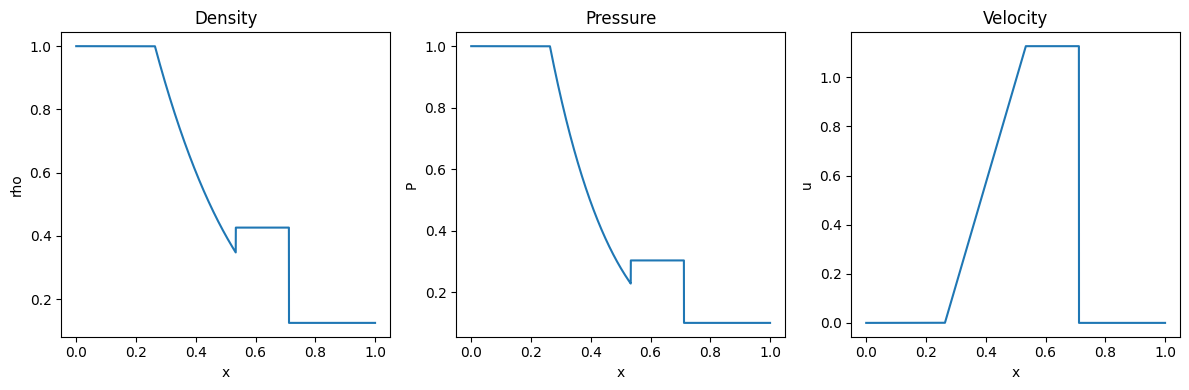

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(x, rho)
ax[0].set_xlabel('x')
ax[0].set_ylabel('rho')
ax[0].set_title('Density')

ax[1].plot(x, P)
ax[1].set_xlabel('x')
ax[1].set_ylabel('P')
ax[1].set_title('Pressure')

ax[2].plot(x, u)
ax[2].set_xlabel('x')
ax[2].set_ylabel('u')
ax[2].set_title('Velocity')

plt.tight_layout()

<span style="color:#78AE7E">

OK, now it ALMOST works, but not entirely. 

It seems like region 2 has a different size in density, pressure and velocity?? So I need to calculate its extents for each case?? 

</span>

<span style="color:#78AE7E">

I will overplot with Bifrost to see what's going on

</span>

<span style="color:#78AE7E">

# A completely different strategy from a random thesis I found online:

[R. Soumen, An Introduction to Fluid Dynamics and Numerical Solution of Shock Tube Problem by Using Roe Solver](https://ui.adsabs.harvard.edu/abs/2021arXiv210302794R)





</span>

In [99]:
# Initial conditions
P_l = 1     ; P_r = 0.1 
rho_l = 1   ; rho_r = 0.125
u_l = 0     ; u_r = 0
t_end = 0.2 ; mu = 0.35 # mu = dt/dx

# Params
gamma = 1.4
gamma_A = gamma - 1
gamma_B = 1 / gamma_A
gamma_C = gamma + 1

P_rl = P_r / P_l
c_r = np.sqrt(gamma * P_r / rho_r)
c_l = np.sqrt(gamma * P_l / rho_l)
c_rl = c_r / c_l
mach_l = (u_l - u_r) / c_l

def func(p_34):
    wortel = np.sqrt(2 * gamma * (gamma_A + gamma_C * p_34)) 
    yy = (gamma_A * c_rl * (p_34 - 1)) / wortel
    yy = (1 + mach_l * gamma_A/2 - yy)**(2 * gamma/gamma_A) 
    y = yy/p_34 - P_rl
    return y

p_34 = fsolve(func, 3.0) # p_34 = p_3 / p_4
print(p_34)

p_3 = p_34 * P_r
alpha = gamma_C / gamma_A 
rho_3 = rho_r * (1 + alpha * p_34) / (alpha + p_34)

rho_2 = rho_l * (p_34 * P_r/P_l)**(1/gamma)
u_2 = u_l - u_r + (2/gamma_A) * c_l * (1 - (p_34 * P_r/P_l)**(gamma_A / (2 * gamma)))
c_2 = np.sqrt(gamma * p_3/rho_2)

# Shock position 
s_pos = (0.5 + t_end * c_r * np.sqrt(gamma_A / (2*gamma) + gamma_C / (2*gamma) * p_34) + t_end * u_r) 

# Contact position
con_pos = (0.5 + u_2*t_end + t_end*u_r)

# Start of expansion fan 
pos_1 = 0.5 + (u_l - c_l)*t_end 

# End of expansion fan
pos_2 = 0.5 + (u_2 + u_r - c_2)*t_end

# Make grid abd empty arrays
x_grid  = np.linspace(0, 1, 100)
P       = np.zeros((1, len(x_grid)))
u       = np.zeros((1, len(x_grid)))
rho     = np.zeros((1, len(x_grid)))
mach    = np.zeros((1, len(x_grid)))
c       = np.zeros((1, len(x_grid)))

xgrid = np.matrix(x_grid)

[3.03130178]


In [100]:
for i in range(xgrid.size):

    if xgrid[0, i] <= pos_1:
        P[0, i] = P_l
        rho[0, i] = rho_l
        u[0, i] = u_l
        c[0, i] = np.sqrt(gamma*P[0, i]/rho[0, i])
        mach[0, i] = u[0, i] / c[0, i]

    elif xgrid[0, i] <= pos_2:
        P[0, i] = (P_l * (1 + (pos_1 - xgrid[0, i]) / (c_l * alpha * t_end))**(2 * gamma / gamma_A))
        rho[0, i] = (rho_l * (1 + (pos_1 - xgrid[0, i]) / (c_l * alpha * t_end))**(2 / gamma_A))
        u[0, i] = u_l + (2/gamma_C)*(xgrid[0, i] - pos_1) / t_end
        c[0, i] = np.sqrt(gamma*P[0, i]/rho[0, i])
        mach[0, i] = u[0, i] / c[0, i]

    elif xgrid[0, i] <= con_pos:
        P[0, i] = p_3
        rho[0, i] = rho_2
        u[0, i] = u_2 + u_r 
        c[0, i] = np.sqrt(gamma*P[0, i]/rho[0, i])
        mach[0, i] = u[0, i] / c[0, i]

    elif xgrid[0, i] <= s_pos:
        P[0, i] = p_3
        rho[0, i] = rho_3
        u[0, i] = u_2 + u_r 
        c[0, i] = np.sqrt(gamma*P[0, i]/rho[0, i])
        mach[0, i] = u[0, i] / c[0, i]

entropy = np.log(P/rho**gamma)

/var/folders/ks/7t6xm_bs73n17df17fz5m7lc0000gn/T/ipykernel_62188/2865034965.py:31: RuntimeWarning: invalid value encountered in divide
  entropy = np.log(P/rho**gamma)


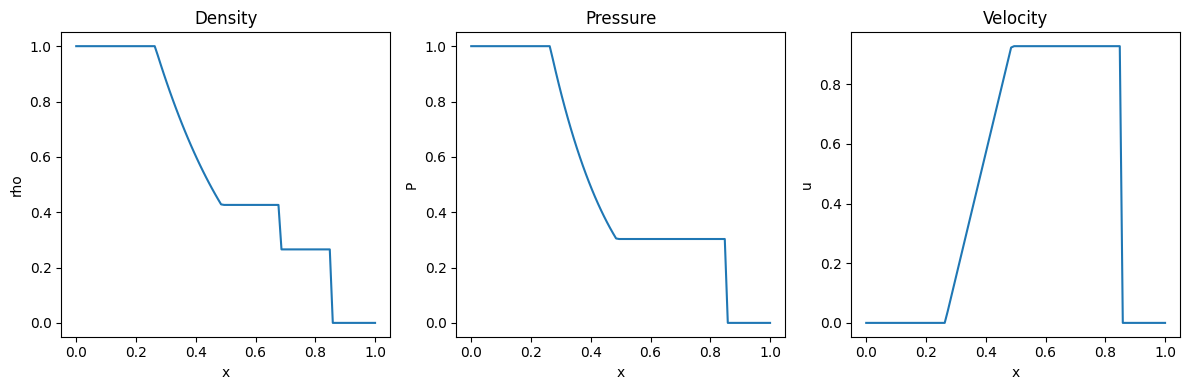

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(x_grid, rho[0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('rho')
ax[0].set_title('Density')

ax[1].plot(x_grid, P[0])
ax[1].set_xlabel('x')
ax[1].set_ylabel('P')
ax[1].set_title('Pressure')

ax[2].plot(x_grid, u[0])
ax[2].set_xlabel('x')
ax[2].set_ylabel('u')
ax[2].set_title('Velocity')

plt.tight_layout()

## 3-  2D models (Aline & Camilla -- turbulence) 

Expand the following equations into a two (or three) dimensions. In order to facilitate the implementation, consider step 1 and 2 already in 3D. So, the variables are 3D (nx,ny,nz). In that case, in 1D, the variables are still 3D, i.e., (nx, 1, 1). Where the derivatives out of the domain are zero, i.e., $\frac{\partial \rho}{\partial z} = 0$

$ \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \bf u) = 0 $

$ \frac{\partial \rho {\bf u}}{\partial t} + \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = - \nabla (P_g)$

$ \frac{\partial e}{\partial t } = -\nabla\cdot e {\bf u} -P_g \nabla \cdot {\bf u}$

Consider to implement Bifrost numerical scheme (derivations, interpolations and hyper diffusive term). To clarify the diadic and tensorial product as well as the multi-dimensions. The momentum conservation becomes into 2 (in 2D) or 3 (in 2.5D or 3D) equations, i.e., for the x, y and/or z components. The following operation $\nabla \cdot (\rho {\bf u} \otimes {\bf u})$  can be expanded as follows for the x, y and z components: 

$\frac {\partial \rho u_x^2}{\partial x} + \frac {\partial \rho u_x u_y}{\partial y} + \frac {\partial \rho u_x u_z}{\partial z}$

$\frac {\partial \rho u_y^2}{\partial y} + \frac {\partial \rho u_x u_y}{\partial x} + \frac {\partial \rho u_y u_z}{\partial z}$

$\frac {\partial \rho u_z^2}{\partial z} + \frac {\partial \rho u_z u_y}{\partial y} + \frac {\partial \rho u_x u_z}{\partial x}$

which comes from the following matrix operations: 

$
\nabla \cdot (\rho {\mathbf{u} \otimes \mathbf{u}})=\left[\begin{array}{c}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z}
\end{array}\right]
\left(\rho
\left[\begin{array}{cccc}
u_{x} u_{x} & u_{x} u_{y} & u_{x} u_{z} \\
u_{y} u_{x} & u_{y} u_{y} & u_{y} u_{z} \\
u_{z} u_{x} & u_{z} u_{y} & u_{z} u_{z}
\end{array}\right]\right)
$


### 3a- Test the code: 

For simplicity, consider a 2D gaussian profile in density which is pressure balance and with an initial velocity (like for 1D case).  I recommend that the initial velocity is diagonal. 

__bonus__ you can also add other test that are described here [Flash code hydro tests](http://flash.uchicago.edu/site/flashcode/user_support/flash_ug_devel/node184.html#SECTION010115000000000000000). From that list, good options are Blast, Sedov explosion, Isentropic Vortex, or Relativistic Two-dimensional Riemann (but not relativistic). 

<span style="color:#78AE7E">

- [ ] 2D Gaussian density perturbation in Bifrost
  - Setting up a new experiment requires Fortran90 coding in the file `experiment_mod.f90`. 
  - I will ask Avijeet if for advice
  - Can I do it in Python somehow?? I doubt it, but... 
- [ ] Choose which other 2D Riemann problems I can check out
  - Blast is probably a good one

</span>

## 4- "chromospheric"-coronal transitions: Prominences and spicules 

### 4.1- Kelvin-Helmhotz instability in Spicules
Kelvin-Helmhotz instability: Spicules are highly dynamic cold dense material traveling into the million degrees corona. Investigate the shear, vortices, scales, and mixing with the following initial setup. 

Divide the domain with background environmetal properties:
1. typical from quiet corona (i.e., 1 million K degrees and densities of $10^{-14}$ g/cm$^3$) and zero velocity 
2. typical from the upper-chromosphere (i.e., 8,000 K degrees and densities of $10^{-12}$ g/cm$^3$) with 100km/s [Chintzoglou et al. 2021](https://iopscience.iop.org/article/10.3847/1538-4357/abc9b1). 

One could consider periodic boundary conditions if the middle of the domain is the upper chromosphere, and the top and bottom is the corona. <span style="color:#78AE7E"> (????) </span>



### 4.2- Rayleigh-Taylor instability in Prominences
Rayleigh-Taylor instability: Solar Prominences are cold dens material embebed in the million degrees corona. 

Add gravity to the HD eqs. Using the same setup but the chromospheric material will be above the corona, both with zero velocity. 
Investigate the vortices, scales, and mixing. In this case, one needs to have **constant extrapolation** at the top and bottom, where the *top is the prominenc*e and *the bottom the corona*.

Investigate with different numerical domains and resolutions in both setups.